In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
import pickle
import seaborn as sns
from textblob import TextBlob

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

from matplotlib.pyplot import figure

### Random Forest Classification with Unbalanced data

In [2]:
# Read the dataset
df = pd.read_csv("tweets_df_with_gender.csv")
df["Tweet"] = df["Text"]
df["Target"] = df["Gender"]
df = df[["Handle","Tweet", "Target"]]
df = df.replace(to_replace = "F", value = 1)
df = df.replace(to_replace = "M", value = 0)
print(len(df))

25165


In [3]:
df.head(10)

,Handle,Tweet,Target
0,@AngiMaryssa,Blackwell is great As a lawyer you have to bec...,0
1,@thiccbb69,math dumb af if ymxb then ytf dont she love me,1
2,@JaredEHalpern,Wow he was a hell of an engineer Grant Imahara...,0
3,@BobBrigham,Matt Kelley is so bad he thinks coronavirus is...,0
4,@AlaskanTzar,he was,0
5,@vomit_bestie,that math test i just took was my absolute bit...,1
6,@ornithopteryx,that is so funnyawesome Does she ever root fo...,1
7,@hawkdynasty526,and ’re the master of science I’m just her to...,1
8,@Steve_ForChange,and opinion and informed opinion An instagr...,1
9,@suchmeerkat,grade he had everyone stand who took this tes...,0


In [4]:
X = df.iloc[:,1:].values
y = df.iloc[:,2:].values

In [5]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen])) 
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)  
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)   
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)   
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)   
    # Converting to Lowercase
    document = document.lower()  
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [6]:
# Create vocabularies
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [7]:
# Split train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

### Hyperparameter validation

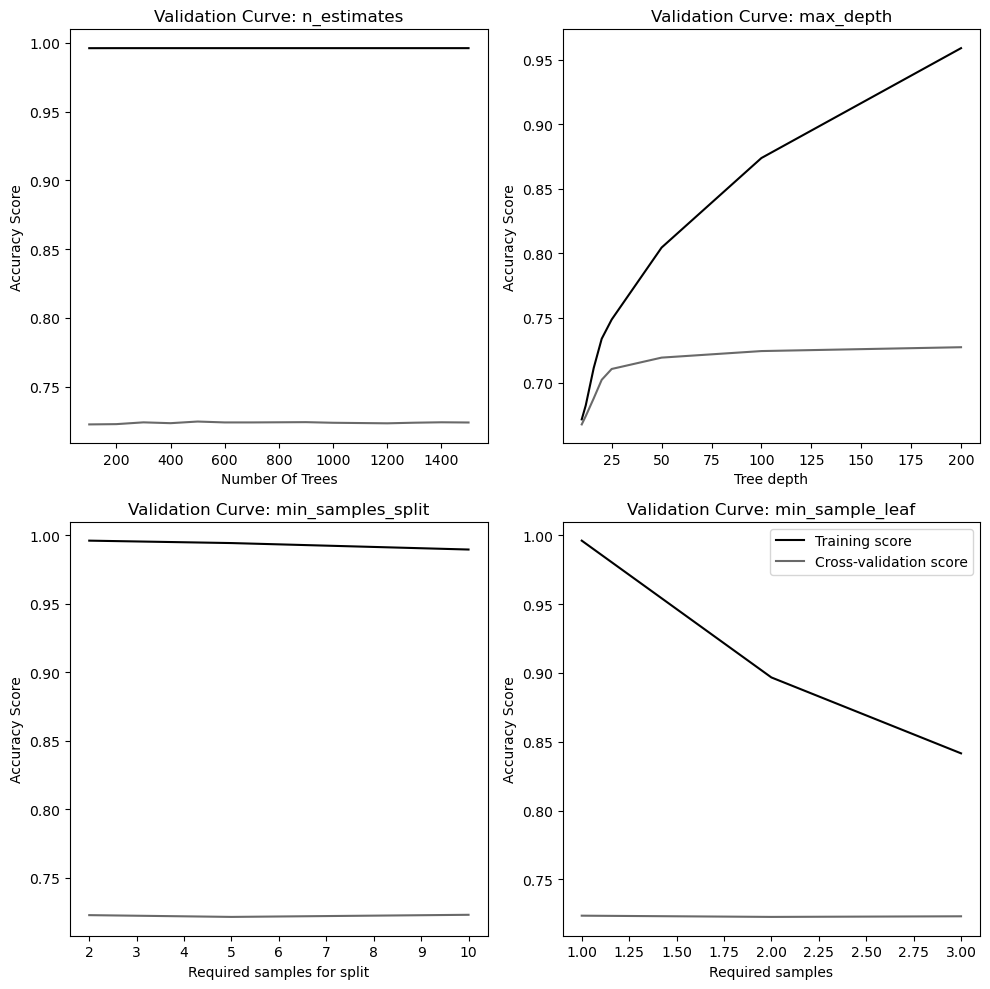

In [8]:
from sklearn.model_selection import validation_curve
from matplotlib.pyplot import figure

num_est= [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,1100, 1200, 1300, 1400, 1500]
max_depth=[10, 12, 16, 20, 25, 50, 100, 200]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3]

figure(figsize=(10, 10), dpi=100)

plt.subplot(2, 2, 1)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train.ravel(), 
                                param_name = 'n_estimators', 
                                param_range = num_est, cv = 3)
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)
plt.plot(num_est, train_mean, label="Training score", color="black")
plt.plot(num_est, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve: n_estimates")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")



plt.subplot(2, 2, 2)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train.ravel(), 
                                param_name = 'max_depth', 
                                param_range = max_depth, cv = 3)
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)
plt.plot(max_depth, train_mean, label="Training score", color="black")
plt.plot(max_depth, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve: max_depth")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy Score")

plt.subplot(2, 2, 3)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train.ravel(), 
                                param_name = 'min_samples_split', 
                                param_range = min_samples_split, cv = 3)
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)
plt.plot(min_samples_split, train_mean, label="Training score", color="black")
plt.plot(min_samples_split, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve: min_samples_split")
plt.xlabel("Required samples for split")
plt.ylabel("Accuracy Score")


plt.subplot(2, 2, 4)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train.ravel(), 
                                param_name = 'min_samples_leaf', 
                                param_range = min_samples_leaf, cv = 3)
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)
plt.plot(min_samples_leaf, train_mean, label="Training score", color="black")
plt.plot(min_samples_leaf, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve: min_sample_leaf")
plt.xlabel("Required samples")
plt.ylabel("Accuracy Score")

plt.tight_layout()
plt.legend(loc="best")

plt.show()


In [11]:
# Apply the classifier using the hyperparameters defined above
classifier = RandomForestClassifier(n_estimators=900, max_depth = 200, min_samples_split = 2, min_samples_leaf = 1, random_state=0)
model = classifier.fit(X_train, y_train.ravel()) 

y_pred = model.predict(X_test)

In [12]:
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print(" ")
print(" ")
print("Classification report:") 
print(classification_report(y_test,y_pred))
print(" ")
print("Accuracy score:", accuracy_score(y_test, y_pred))

Confusion matrix:
[[3048  269]
 [1093  623]]
 
 
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      3317
           1       0.70      0.36      0.48      1716

    accuracy                           0.73      5033
   macro avg       0.72      0.64      0.65      5033
weighted avg       0.72      0.73      0.70      5033

 
Accuracy score: 0.7293860520564276


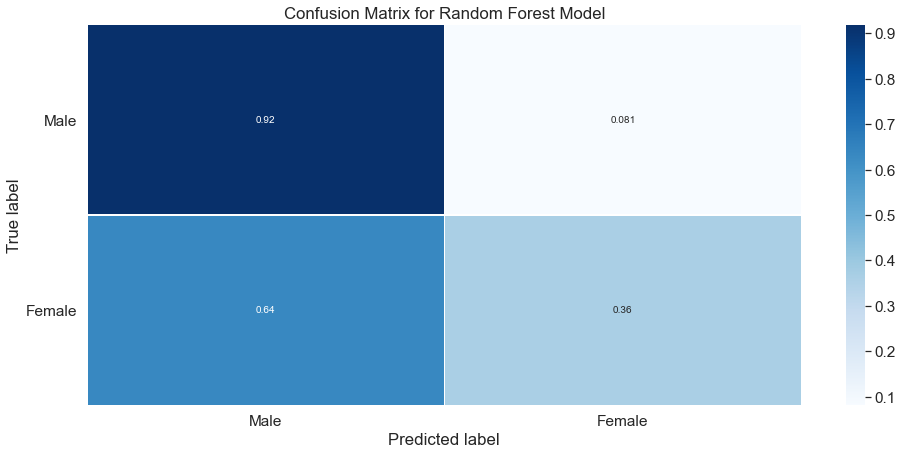

In [13]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Male', 'Female']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# 